# Classic ARIMA Model - Baseline
Use ARIMA as our baseline to forecast future stock prices. We are going to use the classic method to learn how the model works

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and Preprocess Data

In [25]:
# Load and preprocess data
df = pd.read_csv('./berkshire_hathaway_data.csv', index_col=0, parse_dates=True)
df = df[df.index >= '2020-01-01']
df = df.asfreq('D').fillna(method='ffill')
df['log_Close'] = np.log(df['Close'])
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  227.509995  228.389999  226.710007  228.389999  228.389999   
2020-01-03  225.690002  227.429993  225.479996  226.179993  226.179993   
2020-01-04  225.690002  227.429993  225.479996  226.179993  226.179993   
2020-01-05  225.690002  227.429993  225.479996  226.179993  226.179993   
2020-01-06  224.990005  227.130005  224.699997  226.990005  226.990005   
...                ...         ...         ...         ...         ...   
2024-07-25  431.600006  439.630005  431.600006  433.290009  433.290009   
2024-07-26  435.660004  439.000000  434.100006  437.660004  437.660004   
2024-07-27  435.660004  439.000000  434.100006  437.660004  437.660004   
2024-07-28  435.660004  439.000000  434.100006  437.660004  437.660004   
2024-07-29  438.010010  439.440002  435.489990  438.309998  438.309998   

               Volume  log_Close  
Da

# Stationarity Handler
To make sure ARIMA works properly, we remove trends and make the data more stationary.


Test Statistic: -0.5218750340147723
P-Value: 0.8876765782218701
Stationary | D=1
(-0.5218750340147723, 0.8876765782218701, 11, 1659, {'1%': -3.4342978282123258, '5%': -2.8632837412222885, '10%': -2.567698326213784}, -10057.536085265187)


<Axes: xlabel='Date'>

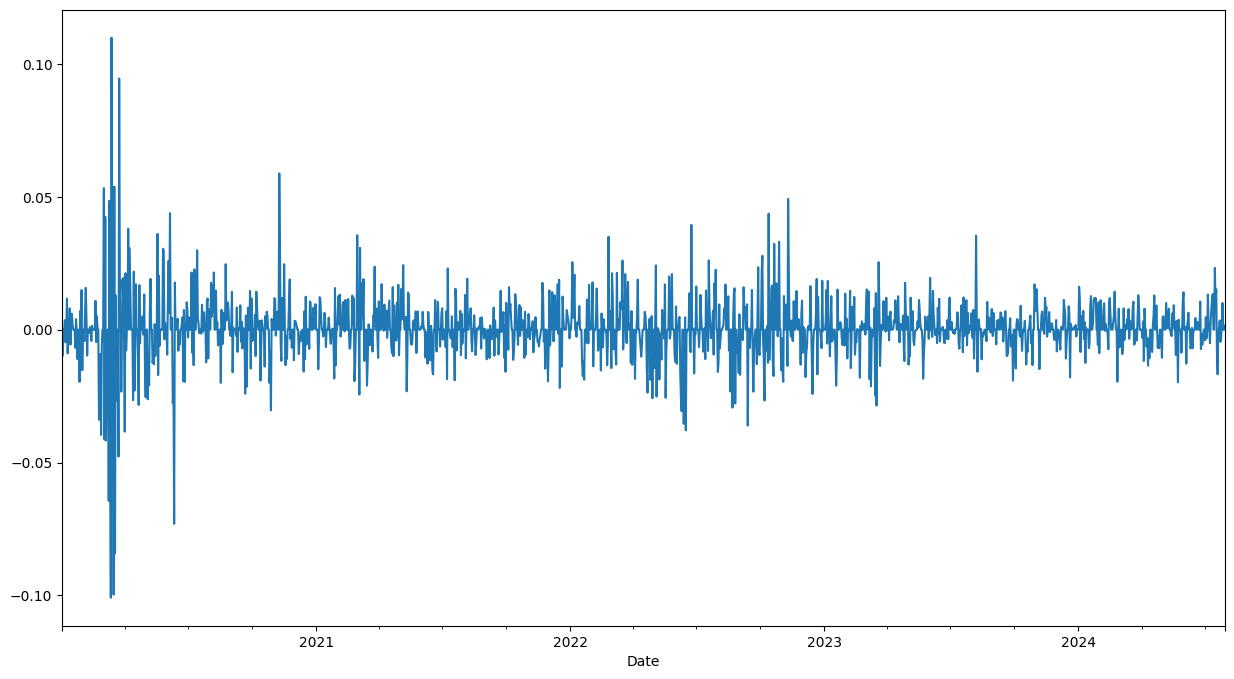

In [ ]:
result = adfuller(df['log_Close'].dropna())

print("Test Statistic:", result[0])
print("P-Value:", result[1])

df['diff_log_Close'] = df['log_Close'].diff().dropna()
if(df['diff_log_Close'][1] < 0.05):
    print("Stationary | D=1")
else:
    print("Non-Stationary")

print(result)

# Plot
df['diff_log_Close'].plot(figsize=(15,8))

# Plot PACF + ACF
The purpose of this si to 

C:\Users\Danyil\AppData\Local\Temp\ipykernel_33912\3814576331.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_pacf.show()
C:\Users\Danyil\AppData\Local\Temp\ipykernel_33912\3814576331.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_pacf.show()


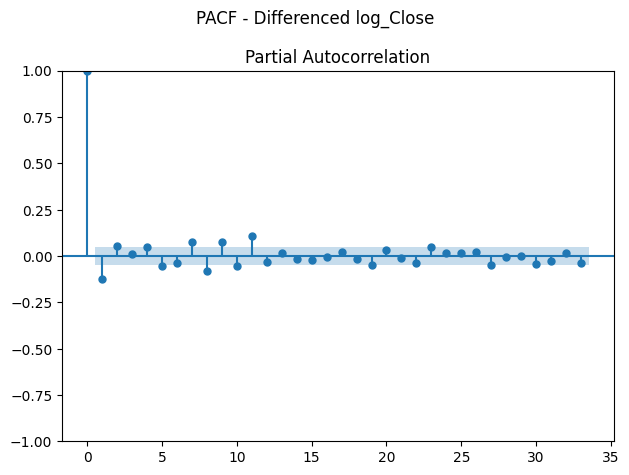

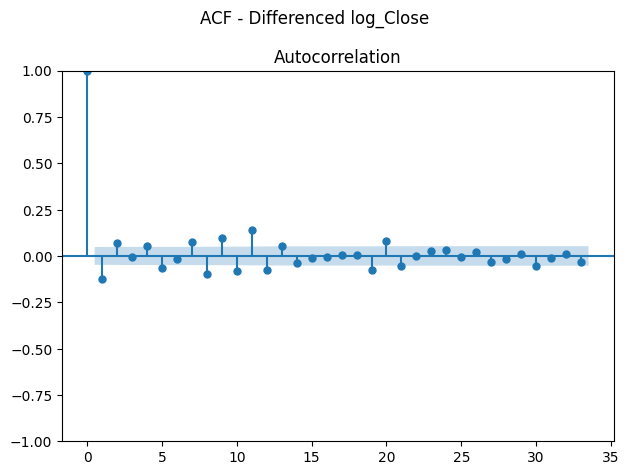

In [27]:
# PACF
fig_pacf = plot_pacf(df['diff_log_Close'].dropna(), method='ywm')
fig_pacf.suptitle("PACF - Differenced log_Close")
fig_pacf.tight_layout()
fig_pacf.show()

# ACF
fig_acf = plot_acf(df['diff_log_Close'].dropna())
fig_acf.suptitle("ACF - Differenced log_Close")
fig_acf.tight_layout()
fig_pacf.show()

# Train Model
Using the information provided from the graphs, we are going to use this to train our model

Predicted next 30 days Close prices:
2024-06-30    406.799988
2024-07-01    406.799988
2024-07-02    406.799988
2024-07-03    406.799988
2024-07-04    406.799988
2024-07-05    406.799988
2024-07-06    406.799988
2024-07-07    406.799988
2024-07-08    406.799988
2024-07-09    406.799988
2024-07-10    406.799988
2024-07-11    406.799988
2024-07-12    406.799988
2024-07-13    406.799988
2024-07-14    406.799988
2024-07-15    406.799988
2024-07-16    406.799988
2024-07-17    406.799988
2024-07-18    406.799988
2024-07-19    406.799988
2024-07-20    406.799988
2024-07-21    406.799988
2024-07-22    406.799988
2024-07-23    406.799988
2024-07-24    406.799988
2024-07-25    406.799988
2024-07-26    406.799988
2024-07-27    406.799988
2024-07-28    406.799988
2024-07-29    406.799988
Freq: D, Name: predicted_mean, dtype: float64


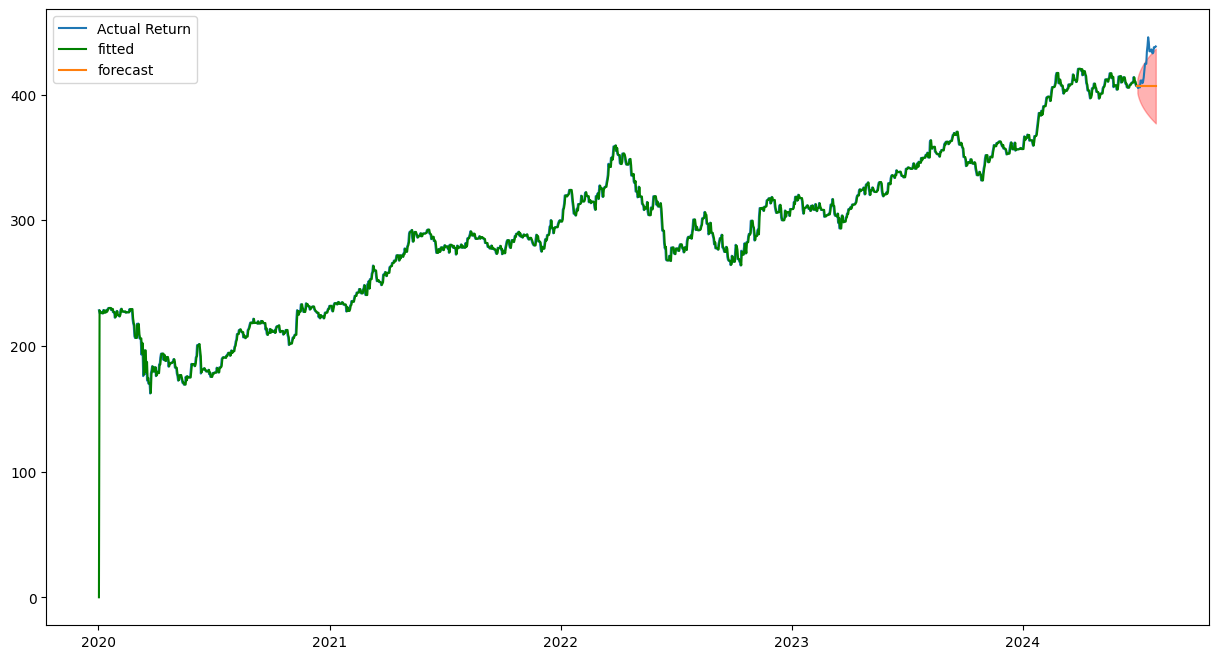

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

arima = ARIMA(train['Close'], order=(0, 1, 0)).fit()
fig, ax= plt.subplots(figsize=(15,8))

# Plot the real values of stock prices
ax.plot(df['Close'], label='Actual Return')

# Plot fitted values of our model
train_pred = arima.fittedvalues
ax.plot(train.index, train_pred, color='green', label='fitted')

prediction_result = arima.get_forecast(30)
conf_int = prediction_result.conf_int()

# Plot lower and upper limits
lower = conf_int[conf_int.columns[0]]
upper = conf_int[conf_int.columns[1]]

forecast = prediction_result.predicted_mean

print("Predicted next 30 days Close prices:")
print(forecast)

ax.plot(test.index, forecast, label='forecast')
ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
ax.legend()

# Evaluate Model
Using RMSE and MAE metrics to see the performance of our model

In [29]:
y_true = test['Close'].values
rmse = np.sqrt(mean_squared_error(y_true, forecast))
mae = mean_absolute_error(y_true, forecast)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 22.248062804324675
MAE: 18.150012207031214
